In [190]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.tools as tls
from matplotlib.widgets import Cursor
# import mplcursors

dir = 'D:\\Python\\DQ_exercises\\DQ_exercises\\downloads\\freddie_mac\\standard'
dq_dir = os.path.join(dir, 'dq_tables')

f_upb = 'Current_Actual_UPB_201701_202312_DQ.parquet'
f_ltv = 'Estimated_Loan-to-Value_ELTV_201704_202312_DQ.parquet'
f_exp = 'Total_Expenses_201701_202312_DQ.parquet'

df_upb = pd.read_parquet(os.path.join(dq_dir, f_upb))
df_ltv = pd.read_parquet(os.path.join(dq_dir, f_ltv))
df_exp = pd.read_parquet(os.path.join(dq_dir, f_exp))

# Set the Date column type to string to make sure it is treated as a categoricaL variable
df_upb['Date'] = df_upb['Date'].astype(str)
df_ltv['Date'] = df_ltv['Date'].astype(str)
df_exp['Date'] = df_exp['Date'].astype(str)

In [153]:
df_upb

,Date,Total Count,Fill Count,Null Count,Fill Rate,Min Value,Max Value,Mean Value,Pct_1,Pct_5,Pct_10,Pct_25,Pct_50,Pct_75,Pct_90,Pct_95,Pct_99
0,201701,9792327,9792327,0,1.0,0.0,1307801.56,165163.154967,960.6680,23086.0310,44784.908,83156.0350,141249.620,226920.7450,325000.000,377938.727,504531.3274
0,201702,9806057,9806057,0,1.0,0.0,1305257.55,165766.952877,2614.4468,24130.5860,45501.286,83671.8000,141875.520,227536.1300,325732.786,378099.092,505029.8200
0,201703,9818340,9818340,0,1.0,0.0,1297685.25,165758.801590,890.9136,23462.7480,45238.867,83559.8725,141931.105,227804.4625,326000.000,378185.102,505422.7890
0,201704,9826937,9826937,0,1.0,0.0,1295103.30,166164.408977,1881.2060,24173.4880,45739.396,83903.2500,142259.130,228206.5400,326326.286,378411.590,506000.0000
0,201705,9835672,9835672,0,1.0,0.0,1292511.67,166026.957890,0.0000,23236.1255,45320.853,83673.3450,142188.660,228267.2375,326412.340,378325.042,506228.0596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,202308,13180733,13180733,0,1.0,0.0,1997000.00,222367.378605,7765.5764,38452.0320,60971.780,112709.0500,193614.090,302582.0300,426911.598,502467.122,666485.8480
0,202309,13197676,13197676,0,1.0,0.0,2000000.00,222781.665310,9158.7475,38916.9700,61354.430,113043.5575,193981.225,302945.0500,427287.685,503398.725,668055.8375
0,202310,13216177,13216177,0,1.0,0.0,1998000.00,222862.438694,8988.7192,38807.5040,61322.170,113084.9100,194015.740,303000.0000,427420.984,503934.234,669000.0000
0,202311,13157766,13157766,0,1.0,0.0,1996000.00,222593.344736,9689.6885,38918.9375,61347.675,113000.0000,193824.735,302569.8350,426776.475,503108.340,667900.5830


In [104]:
df_ltv  # LTV of 999 means 'unknown', so those values were treated as nulls

,Date,Total Count,Null Count,Fill Count,Fill Rate,Min Value,Max Value,Mean Value,Pct_1,Pct_5,Pct_10,Pct_25,Pct_50,Pct_75,Pct_90,Pct_95,Pct_99
0,201704,9826937,940189,8886748,0.904325,1.0,991.0,53.845771,3.0,13.0,23.0,39.0,56.0,70.0,81.0,87.0,100.0
0,201705,9835672,959261,8876411,0.902471,1.0,941.0,53.360266,3.0,13.0,22.0,38.0,55.0,69.0,80.0,86.0,98.0
0,201706,9841600,964268,8877332,0.902021,1.0,941.0,52.972174,3.0,13.0,22.0,38.0,55.0,69.0,79.0,86.0,97.0
0,201707,9856304,948698,8907606,0.903747,1.0,955.0,52.936481,3.0,13.0,22.0,38.0,55.0,69.0,79.0,86.0,97.0
0,201708,9872130,960246,8911884,0.902732,1.0,966.0,53.142687,3.0,14.0,22.0,38.0,55.0,69.0,80.0,86.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,202308,13180733,702230,12478503,0.946723,1.0,561.0,44.802120,4.0,11.0,17.0,30.0,45.0,59.0,72.0,79.0,93.0
0,202309,13197676,741284,12456392,0.943832,1.0,635.0,45.375256,4.0,11.0,18.0,30.0,45.0,59.0,73.0,80.0,93.0
0,202310,13216177,735935,12480242,0.944316,1.0,574.0,45.613160,4.0,11.0,18.0,31.0,46.0,60.0,73.0,81.0,94.0
0,202311,13157766,707611,12450155,0.946221,1.0,529.0,45.531526,4.0,11.0,18.0,30.0,45.0,60.0,73.0,81.0,94.0


In [112]:
# upb_min = df_upb['Min Value'].min()
# upb_max = df_upb['Max Value'].max()
upb_min_y = 0
upb_max_y = 700000
upb_min_date = df_upb['Date'].min()
upb_max_date = df_upb['Date'].max()

<class 'str'>


In [106]:
# ltv_min = df_ltv['Min Value'].min()
# ltv_max = df_ltv['Max Value'].max()
ltv_min_y = 0
ltv_max_y = 105
ltv_min_date = df_ltv['Date'].min()
ltv_max_date = df_ltv['Date'].max()

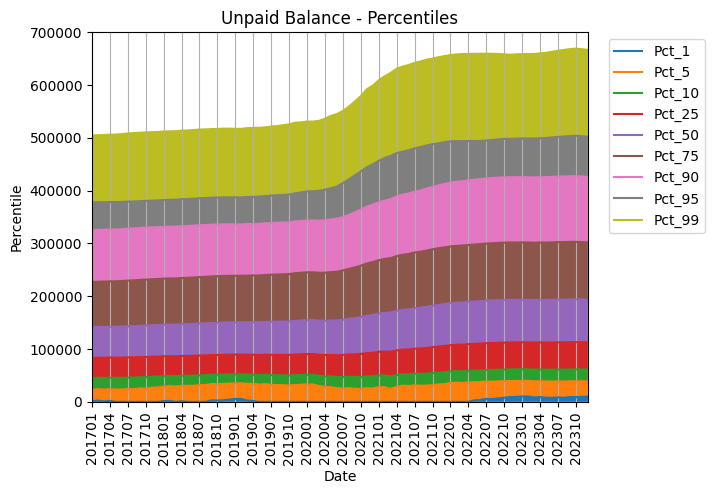

In [184]:
upb_pct_labels = [col for col in df_upb.columns if col.startswith('Pct_')]

tick_spacing = 3
fig, ax = plt.subplots(1,1)

for pct in upb_pct_labels:
    plt.plot(df_upb['Date'], df_upb[pct], label=pct)

ax.legend(bbox_to_anchor=(1.25, 1.0))  # Shift legend outside of plot
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.fill_between(x=df_upb['Date'], y1=df_upb['Pct_1'], y2=upb_min_y)
prev = df_upb['Pct_1']
for pct in upb_pct_labels[1:]:
    ax.fill_between(x=df_upb['Date'], y1=df_upb[pct], y2=prev)
    prev = df_upb[pct]
# ax.fill_between(x=df_upb['Date'], y1=upb_max_y, y2=df_upb['Pct_99'])

plt.axis([upb_min_date, upb_max_date, upb_min_y, upb_max_y])
plt.title('Unpaid Balance - Percentiles')
plt.xlabel('Date')
plt.ylabel('Percentile')
plt.xticks(rotation=90)
plt.grid(axis='x')

plt.show()

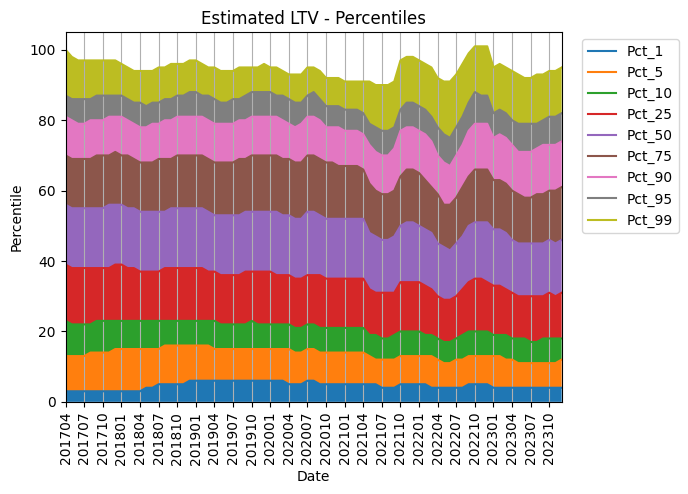

In [185]:
ltv_pct_labels = [col for col in df_ltv.columns if col.startswith('Pct_')]

tick_spacing = 3
fig, ax = plt.subplots(1,1)

for pct in ltv_pct_labels:
    plt.plot(df_ltv['Date'], df_ltv[pct], label=pct)

plt.axis([ltv_min_date, ltv_max_date, ltv_min_y, ltv_max_y])
plt.title('Estimated LTV - Percentiles')
plt.xlabel('Date')
plt.ylabel('Percentile')
plt.xticks(rotation=90)
plt.grid(axis='x')

ax.legend(bbox_to_anchor=(1.25, 1.0), labels=ltv_pct_labels)  # Shift legend outside of plot
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax.fill_between(x=df_ltv['Date'], y1=df_ltv['Pct_1'], y2=ltv_min_y)
prev = df_ltv['Pct_1']
for pct in ltv_pct_labels[1:]:
    ax.fill_between(x=df_ltv['Date'], y1=df_ltv[pct], y2=prev)
    prev = df_ltv[pct]

plt.show()

In [181]:
varname = 'Estimated LTV'
val = 'Fill Rate'
y_min, y_max = 0, 1
# val = 'Max Value'
# y_min, y_max = 0, 1000
# val = 'Min Value'
# y_min, y_max = 0, 10
# val = 'Mean Value'
# y_min, y_max = 0, 100
# val = 'Total Count'
# y_min, y_max = 0, 2e7
# val = 'Fill Count'
# y_min, y_max = 0, 2e7
# val = 'Null Count'
# y_min, y_max = 0, 2e7

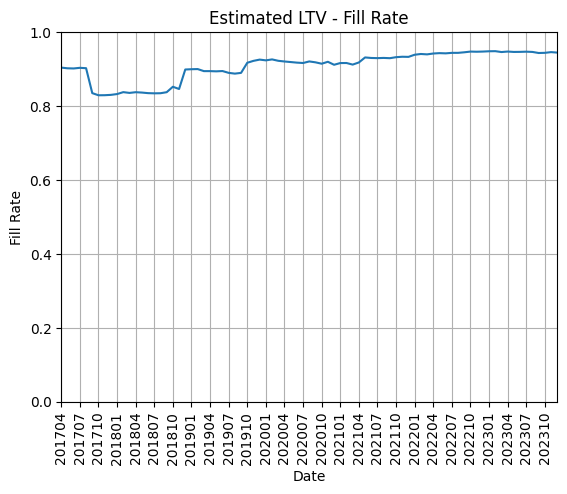

In [182]:
fig, ax = plt.subplots(1,1)
x_min = df_ltv['Date'].min()
x_max = df_ltv['Date'].max()

plt.plot(df_ltv['Date'], df_ltv[val], label=val)

# plt.xlim(x_min, x_max)
plt.axis([x_min, x_max, y_min, y_max])
plt.title(f'{varname} - {val}')
plt.xlabel('Date')
plt.ylabel(val)
plt.xticks(rotation=90)
plt.grid(axis='both')

# ax.legend(bbox_to_anchor=(1.25, 1.0), labels=ltv_pct_labels)  # Shift legend outside of plot
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# cursor = AnnotatedCursor(line=lin[0], ax=ax, useblit=True)
# cursor = Cursor(line=fig, ax=ax, useblit=True)

# mplcursors.cursor(hover=True)

"""
Convert plt to a plotly figure in order to add hover feature
NOTE: All matplotlib.pyplot formatting will be lost
# plotly_fig = tls.mpl_to_plotly(plt.gcf())
# plotly_fig.update_layout(hovermode='x')
# plotly_fig.show()
"""
plt.show()

In [189]:
df_ltv.loc[df_ltv['Date'] < df_ltv['Date'].max(), 'Date']

0    201704
0    201705
0    201706
0    201707
0    201708
      ...  
0    202307
0    202308
0    202309
0    202310
0    202311
Name: Date, Length: 80, dtype: object

In [191]:
df_exp

,Date,Total Count,Null Count,Fill Count,Fill Rate,Min Value,Max Value,Mean Value,Pct_1,Pct_5,Pct_10,Pct_25,Pct_50,Pct_75,Pct_90,Pct_95,Pct_99
0,201701,9792327,9790743,1584,1.617593e-04,-197933.06,299296.23,-22436.155903,-104713.1549,-67635.0670,-50070.037,-29649.9525,-16129.330,-7674.8925,-3119.082,-1522.8835,-85.0000
0,201702,9806057,9804474,1583,1.614308e-04,-462757.97,503296.76,-23283.946917,-114202.8050,-70571.5570,-49892.556,-30696.4450,-16847.600,-8323.1750,-3466.426,-1423.2710,-15.9818
0,201703,9818340,9816454,1886,1.920895e-04,-173267.92,80297.25,-23364.998537,-103502.6650,-70264.8250,-49695.205,-31576.3800,-17537.990,-7830.4275,-3307.775,-1229.4500,-85.0000
0,201704,9826937,9825379,1558,1.585438e-04,-217090.06,145131.53,-23797.347452,-120162.9643,-71253.5035,-54937.388,-30311.8225,-17112.215,-8189.1250,-3126.576,-1439.9855,0.0000
0,201705,9835672,9832335,3337,3.392752e-04,-224683.16,198615.80,-21969.171079,-113178.1540,-61888.4700,-43847.658,-27007.6000,-16607.160,-9387.8100,-4760.864,-2349.0600,-92.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,202308,13180733,13180337,396,3.004385e-05,-501150.31,131886.64,-28715.591212,-143271.3055,-100363.9225,-71740.445,-36509.2425,-16323.650,-6767.1350,-1915.000,-158.7500,0.0000
0,202309,13197676,13197310,366,2.773216e-05,-283769.19,113934.03,-26478.291421,-127583.6120,-86904.0875,-66933.655,-37865.1400,-15293.650,-5190.4650,-742.940,-100.0000,17364.3540
0,202310,13216177,13216172,5,3.783242e-07,0.00,0.00,0.000000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000
0,202311,13157766,13157764,2,1.520015e-07,0.00,0.00,0.000000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000


In [196]:
print(df_exp['Min Value'].min())
print(df_exp['Max Value'].min())
print(df_exp['Max Value'].max())
print(df_exp['Mean Value'].min())
print(df_exp['Pct_1'].min())
print(df_exp['Pct_99'].max())

-501150.31
0.0
1019399.91
-29548.215285359824
-187799.4454
53061.725200000044
